# 3.2.4 - Árboles de Decisión para la Clasificación


* En este Notebook vamos a ver los ***Árboles de Decisión para la Clasificación*** y vamos a ***resolver un problema de clasificación usando*** la implementación de este Algoritmo de Aprendizaje con la ***librería de scikit-learn***.


* Vamos a tratar los siguientes puntos:
<span></span><br>
    1. [Árboles de Decisión](#M1)
<span></span><br>
    2. [Ejemplo de Clasificación de Pacientes con Diabetes](#M2)
    <span></span><br>
        2.1. [Carga de datos](#M21)
    <span></span><br>
        2.2. [Cambio de estructura de datos a numpy y Particionado de datos en Entrenamiento y Test](#M22)
    <span></span><br>
        2.3. [Visualización de los datos](#M23)
    <span></span><br>
        2.4. [Creacción y ajuste de los modelos](#M24)
    <span></span><br>
        2.5. [Visualización de los Árboles obtenidos](#M25)
    <span></span><br>
        2.6. [Evaluación de los modelos](#M26)
    <span></span><br>
        2.7. [Conclusiones](#M27)


<hr>



## <a name="M1">1. Árboles de Decisión</a>


* Los ***Árboles de Decisión son un Algoritmo de Aprendizaje que tiene como objetivo generar un gráfo de decisión*** que permita predecir la variable objetivo en función del valor de las variables de entrada.


* Un ejemplo de árbol de decisión para la concesión de un credito bancario pordría ser el siguiente:


<img src="../../imgs/3_02_04_06_cart.png" style="width: 400px;"/>


* Cada nodo del gráfo define una condición en función del valor de una variable y si cumple o no cumple la condición las aristas no llevaran a otro nodo condicional o a la solución final.


* Por tanto el ***objetivo de los Árboles de Decisión es el de aprender a construir estos grafos*** (o árboles).


* A los ***Árboles de Decisión se les conoce como CART (Classification And Regression Trees)*** ya que estos permiten resolver tanto problemas de clasificación como problemas de regresión.


* Veamos a continuación como se construiria un Arbol de Decisión para clasificar los siguientes puntos rojos y verdes:

<img src="../../imgs/3_02_04_01_cart.png" style="width: 350px;"/>

* El algoritmo lo que hace es ir diviendo el conjunto de datos en "trozos" en función del valor de una variable. Por ejemplo como primer paso podemos dividir nuestro Dataset en dos partes; una cuyos valores de X2 sean mayores a 20 y los otros menores a 20. De esta manera ya hemos construido nuestro primer nodo del árbol de decisión:

<img src="../../imgs/3_02_04_02_cart.png" style="width: 700px;"/>


* En segundo lugar, podemos dividir en dos partes aquellos elementos con valores de X2 mayores a 20; por tanto dividimos esta sección en función de la condición de que X1 sea mayor o menor a 28. Con esta condición ya podemos clasificar los puntos verdes y rojos que cumplen que X2 es mayor a 20 y que X1 es mayor o menor que 28 respectivamente.

<img src="../../imgs/3_02_04_03_cart.png" style="width: 800px;"/>


* De esta manera seguimos dividiendo los datos según una serie de condiciones hasta conseguir la clasificación final:


<img src="../../imgs/3_02_04_05_cart.png" style="width: 900px;"/>


### ¿Cómo se construyen los Árboles de Decisión?


* El ***Algoritmo de Aprendizje utiliza un Algoritmo Voraz para construir el Árbol de decisión optimizando la siguiente función de perdida***:

$$J(X_i,L_x) = \frac{m_{left}}{m} \cdot D_{left} + \frac{m_{right}}{m} \cdot D_{right}$$


* Donde:
    - $X_i$ es una de las variables del Dataset.
    - $L_x$ es el límite de la variable.
    - $m$ es el número de elementos del Dataset; siendo los $m_{left}$ y $m_{right}$ el número de elementos que hay en la partición realizada.
    - $D$ es el valor de una función que nos devuelve una ***medida de calidad de la división*** realizada.
    

##### Algoritmo voraz: Los algoritmos voraces son un tipo de algoritmos usados para resolver problemas de optimización combinatoria y estos problemas los resuelven los resuelven eligiendo en cada paso la opción óptima (sin importar los siguientes pasos) con la esperanza de llegar a una solución general óptima.


* Como medida de calidad de la división o decisión tomada, se usan dos medidas conocidad como 'Gini' y 'Entropia'.


* ***'Gini'*** es una medida de impureza que nos indica como de mezcladas estan las clases a clasificar dentro de la decisión o división realizada. Gini tendrá valor '0' cuando al tomar una decisión la clasificación realizada sea perfecta; es decir, cuando el nodo es totalmente puro. Esta medida se calcula usando la siguiente fórmula; siendo $P_k$ la probabilidad de cada clase:
    
$$gini = 1 -  \sum_{k=1}^{K} P^{2}_{k}$$ 


* La ***'Entropia'*** es una medida de incertidumbre (desorden) que devuelve la cantidad de información promedio existente es la división realizada. La entropia tendrá valor '0' cuando al tomar una decisión la clasificación realizada sea perfecta y por tanto no haya desorden y tendrá valores cercanos a '1' cuando al tomar la decisión no seamos capaces de discernir entre las dos clases (muchos desorden). Esta medida se calcula usando la siguiente fórmula:

    
$$Entropia =  -  \sum_{k=1}^{K} P_{k} \cdot log_2 \cdot P_{k} $$ 


<hr>


## <a name="M2">2. Ejemplo de Clasificación de Pacientes con Diabetes</a>


* En el siguiente ejemplo vamos a Clasificar a las personas en Diabéticas y no Diabéticas en función de una serie de variables usando los arboles de decisión implementados en la librería de Scikit-Learn:


* Para resolver el problema de Clasificación vamos a utilizar la clase **"DecisionTreeClassifier()"**, cuya documentación esta en el siguiente enlace:<br>   
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


* Crearemos ***dos modelos*** diferentes, usando como ***criterio de división la 'Entropia' y la medida de impureza 'Gini'***.


* Para realizar esta clasificación vamos a tener las siguientes variables de los pacientes:

    - ***Pregnancies***: Number of times pregnant
    - ***GlucosePlasma***: glucose concentration
    - ***BloodPressure***: Diastolic blood pressure
    - ***SkinThickness***: Triceps skin fold thickness
    - ***Insulin***: 2-Hour serum insulin
    - ***BMI***: Body mass index 
    - ***DiabetesPedigreeFunction***: Diabetes pedigree function
    - ***Age***: Age
    - ***OutcomeClass***: variable (0 or 1) 268 of 768 are 1, the others are 0


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    2.1. [Carga de datos](#M21)
<span></span><br>
    2.2. [Cambio de estructura de datos a numpy y Particionado de datos en Entrenamiento y Test](#M22)
<span></span><br>
    2.3. [Visualización de los datos](#M23)
<span></span><br>
    2.4. [Creacción y ajuste de los modelos](#M24)
<span></span><br>
    2.5. [Visualización de los Árboles obtenidos](#M25)
<span></span><br>
    2.6. [Evaluación de los modelos](#M26)
<span></span><br>
    2.7. [Conclusiones](#M27)


* En primer lugar vamos a importar las librería necesarias:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pydotplus
import collections

from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
%matplotlib inline 

<hr>


### <a name="M21">2.1. Carga de datos</a>

* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "../../data/diabetes.csv"

In [2]:
df = pd.read_csv("../../data/diabetes.csv")
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
617,2,68,62,13,15,20.1,0.257,23,0
673,3,123,100,35,240,57.3,0.880,22,0
659,3,80,82,31,70,34.2,1.292,27,1
609,1,111,62,13,182,24.0,0.138,23,0
264,4,123,62,0,0,32.0,0.226,35,1


<hr>

### <a name="M22">2.2. Cambio de estructura de datos a numpy y Particionado de datos en Entrenamiento y Test</a>


In [3]:
# Paso a Numpy
x_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
              'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[x_features].values
y = df['Outcome'].values 

# División de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<hr>


### <a name="M23">2.3. Visualización de los datos</a>


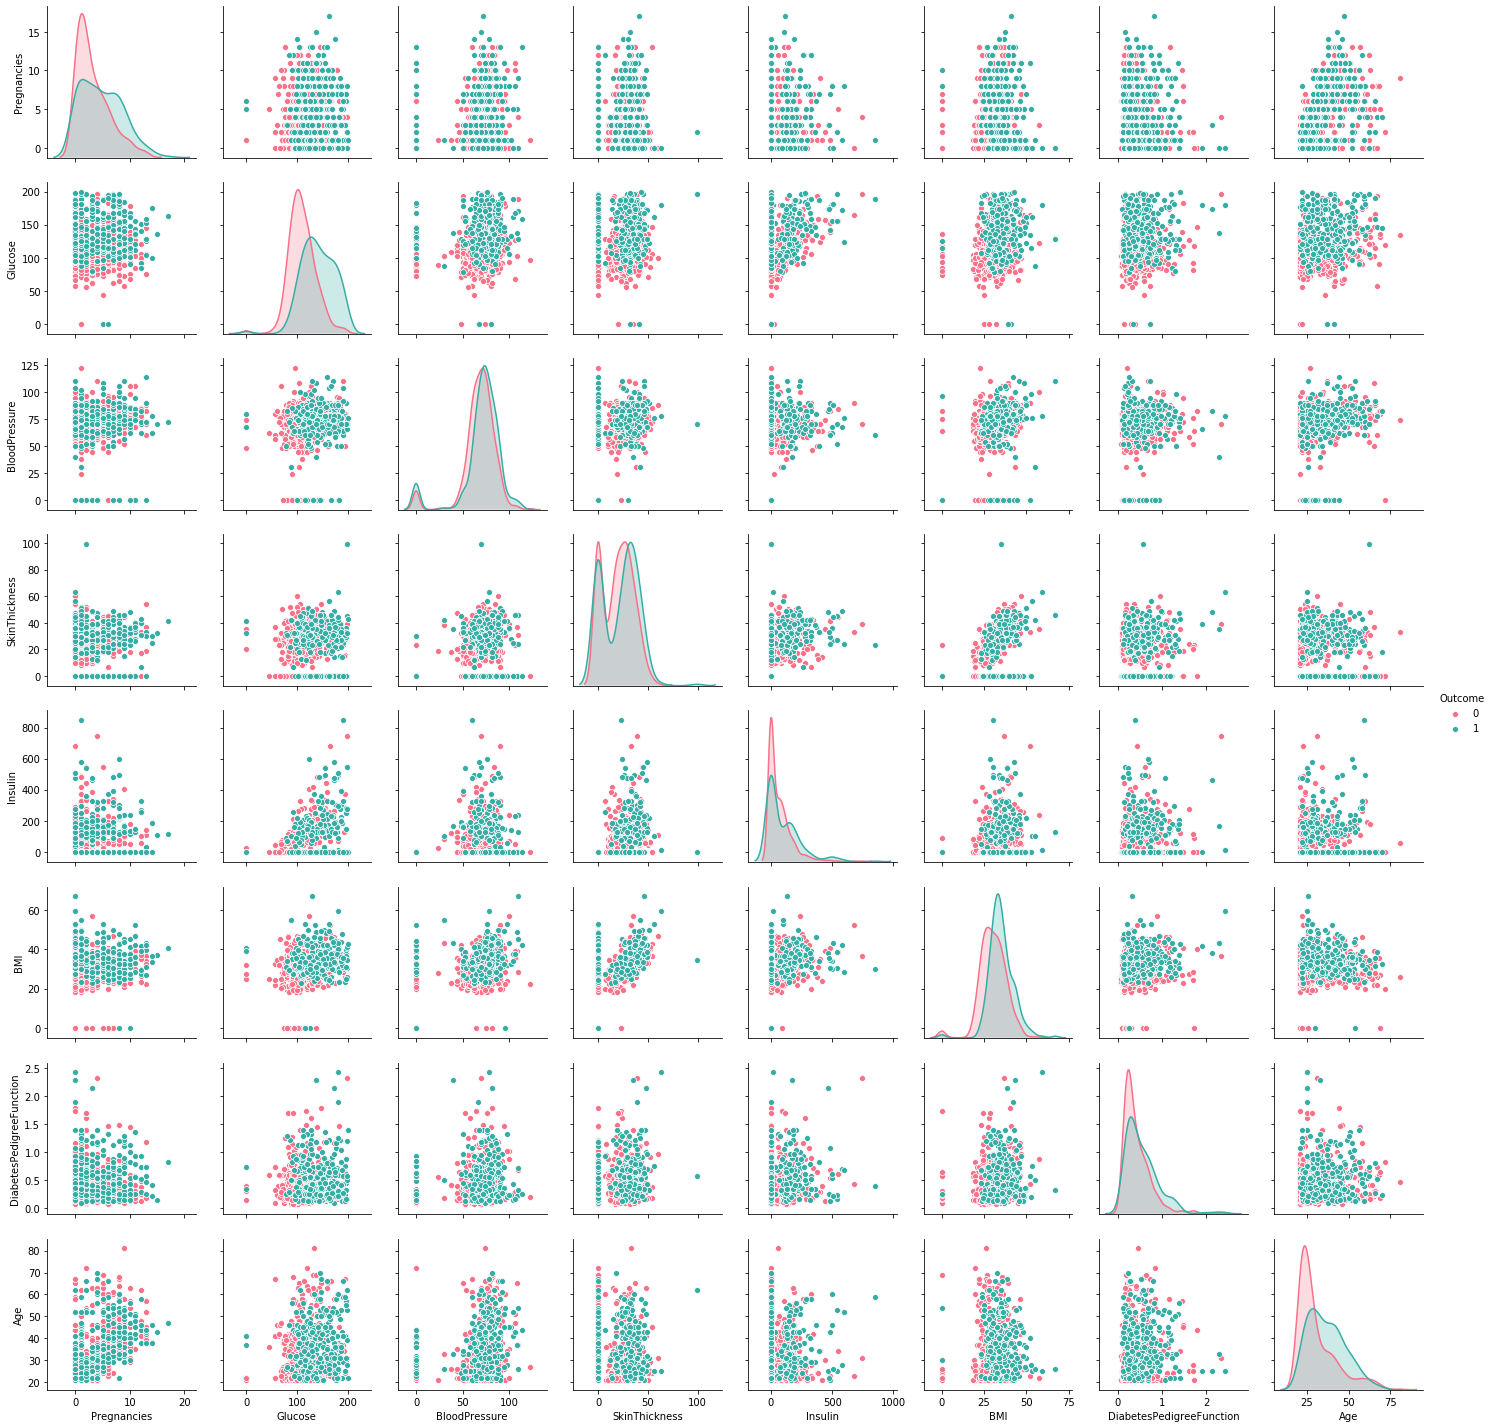

In [4]:
sns.pairplot(df, hue="Outcome", palette="husl", vars=x_features)

<hr>


### <a name="M24">2.4. Creacción y ajuste de los modelos</a>


In [5]:
dt_gini_p3 = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt_gini_p5 = DecisionTreeClassifier(criterion='gini', max_depth=5)
dt_gini_p10 = DecisionTreeClassifier(criterion='gini', max_depth=10)
dt_entropy_p3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_entropy_p5 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt_entropy_p10 = DecisionTreeClassifier(criterion='entropy', max_depth=10)

clasificadores = {'DT Gini Depth 3': dt_gini_p3,
                  'DT Gini Depth 5': dt_gini_p5,
                  'DT Gini Depth 10': dt_gini_p10,
                  'DT Entropy Depth 3': dt_entropy_p3,
                  'DT Entropy Depth 5': dt_entropy_p5,
                  'DT Entropy Depth 10': dt_entropy_p10}


# Ajustamos los modelos
for k, v in clasificadores.items():
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    v.fit(X_train, y_train)

CREANDO MODELO: DT Gini Depth 3
CREANDO MODELO: DT Gini Depth 5
CREANDO MODELO: DT Gini Depth 10
CREANDO MODELO: DT Entropy Depth 3
CREANDO MODELO: DT Entropy Depth 5
CREANDO MODELO: DT Entropy Depth 10


<hr>


### <a name="M25">2.5. Visualización de los Árboles obtenidos</a>


* Una vez creados los arboles de decisión, podemos visualizarlos para ver que decisiones toman en función del valor de las variables.


* A modo de ejemplo vamos a mostrar solo los árboles creados con el criterio de división Gini.

In [6]:
def graph_tree(model, feature_names, class_names):
    """
    Función que crea el gráfico del arbol de decisión
    model: modelo del árbol de decisión
    feature_names: lista con el nombre de las variables de entrada
    class_names: lista con el nombre de las clases
    """
    dot_data = export_graphviz(model, feature_names=feature_names, class_names=class_names, 
                               out_file=None, filled=True, rounded=True)
    
    graph = pydotplus.graph_from_dot_data(dot_data)

    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]

    return graph

Arbol de Decisión Gini Depth 3


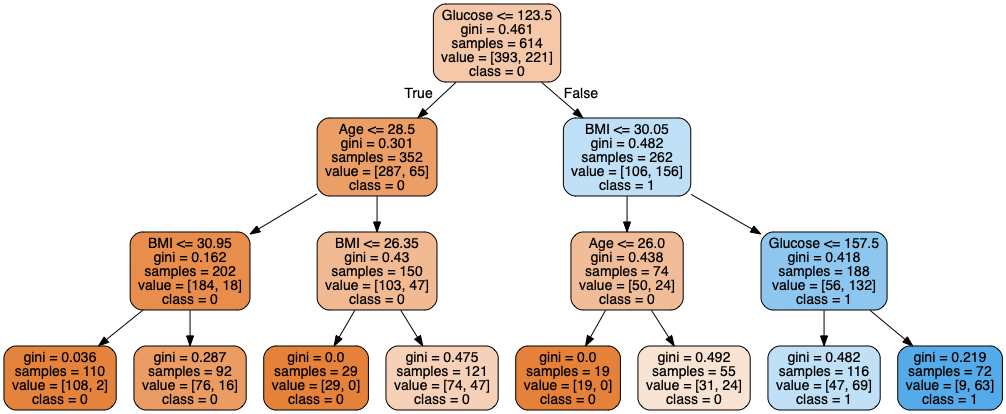

In [7]:
class_names = ['0', '1']

print("Arbol de Decisión Gini Depth 3")
graph = graph_tree(model=clasificadores['DT Gini Depth 3'], feature_names=x_features, class_names=class_names)
Image(graph.create_png())

Arbol de Decisión Gini Depth 5


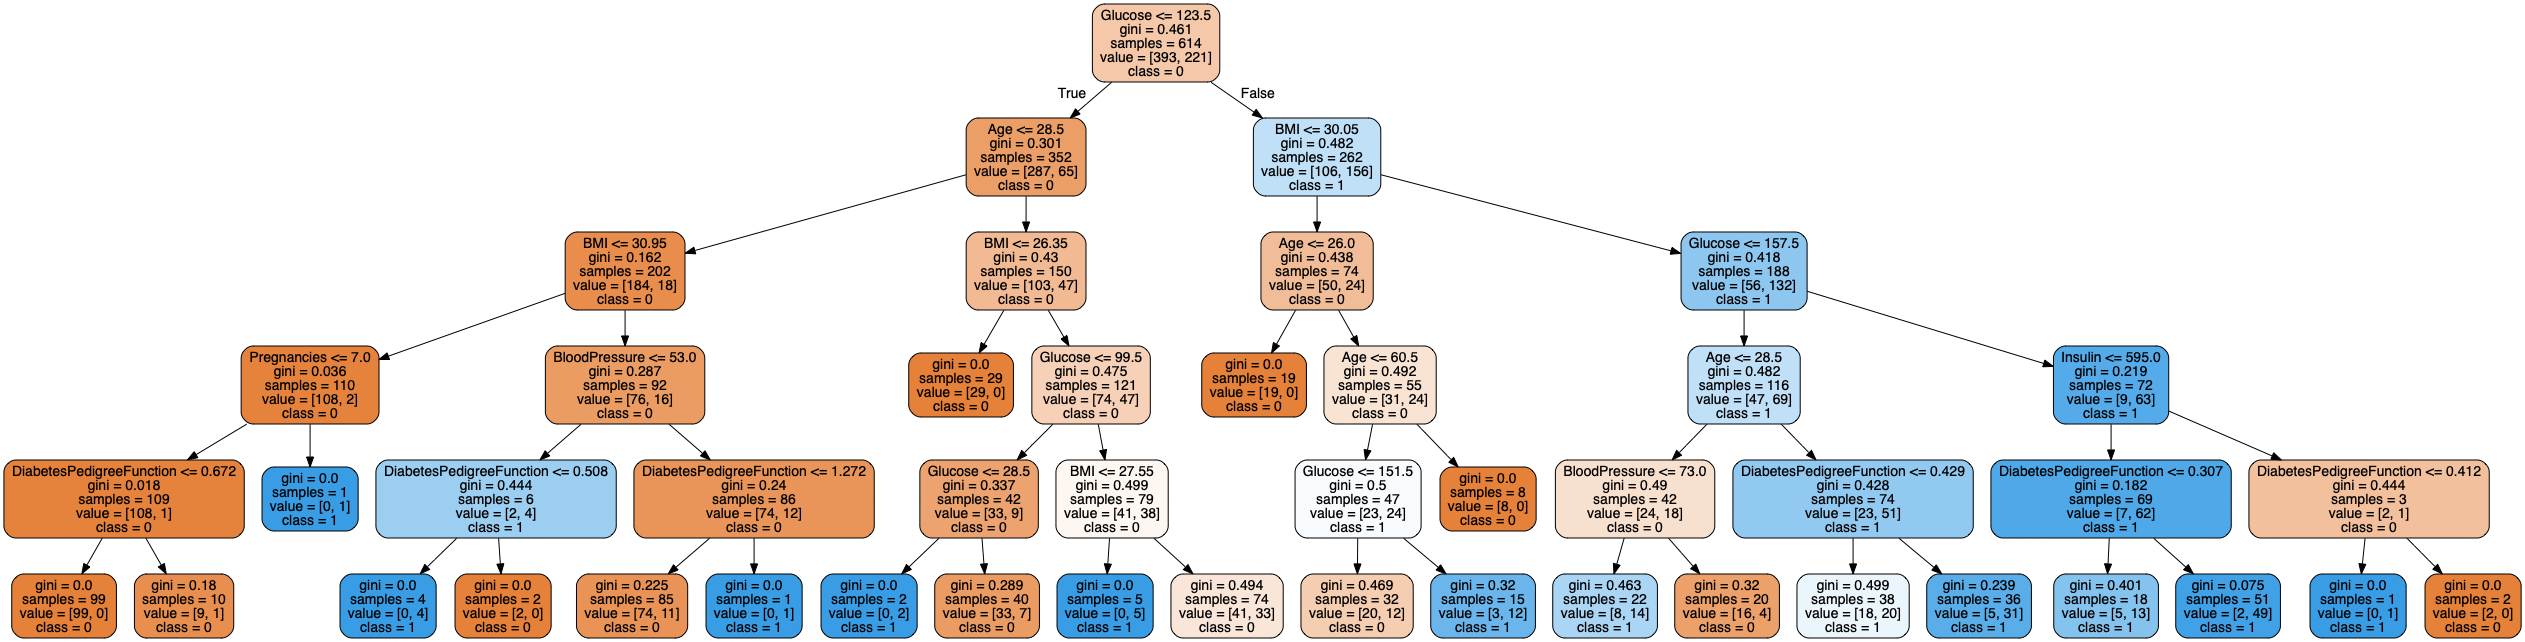

In [8]:
print("Arbol de Decisión Gini Depth 5")
graph = graph_tree(model=clasificadores['DT Gini Depth 5'], feature_names=x_features, class_names=class_names)
Image(graph.create_png())

Arbol de Decisión Gini Depth 10


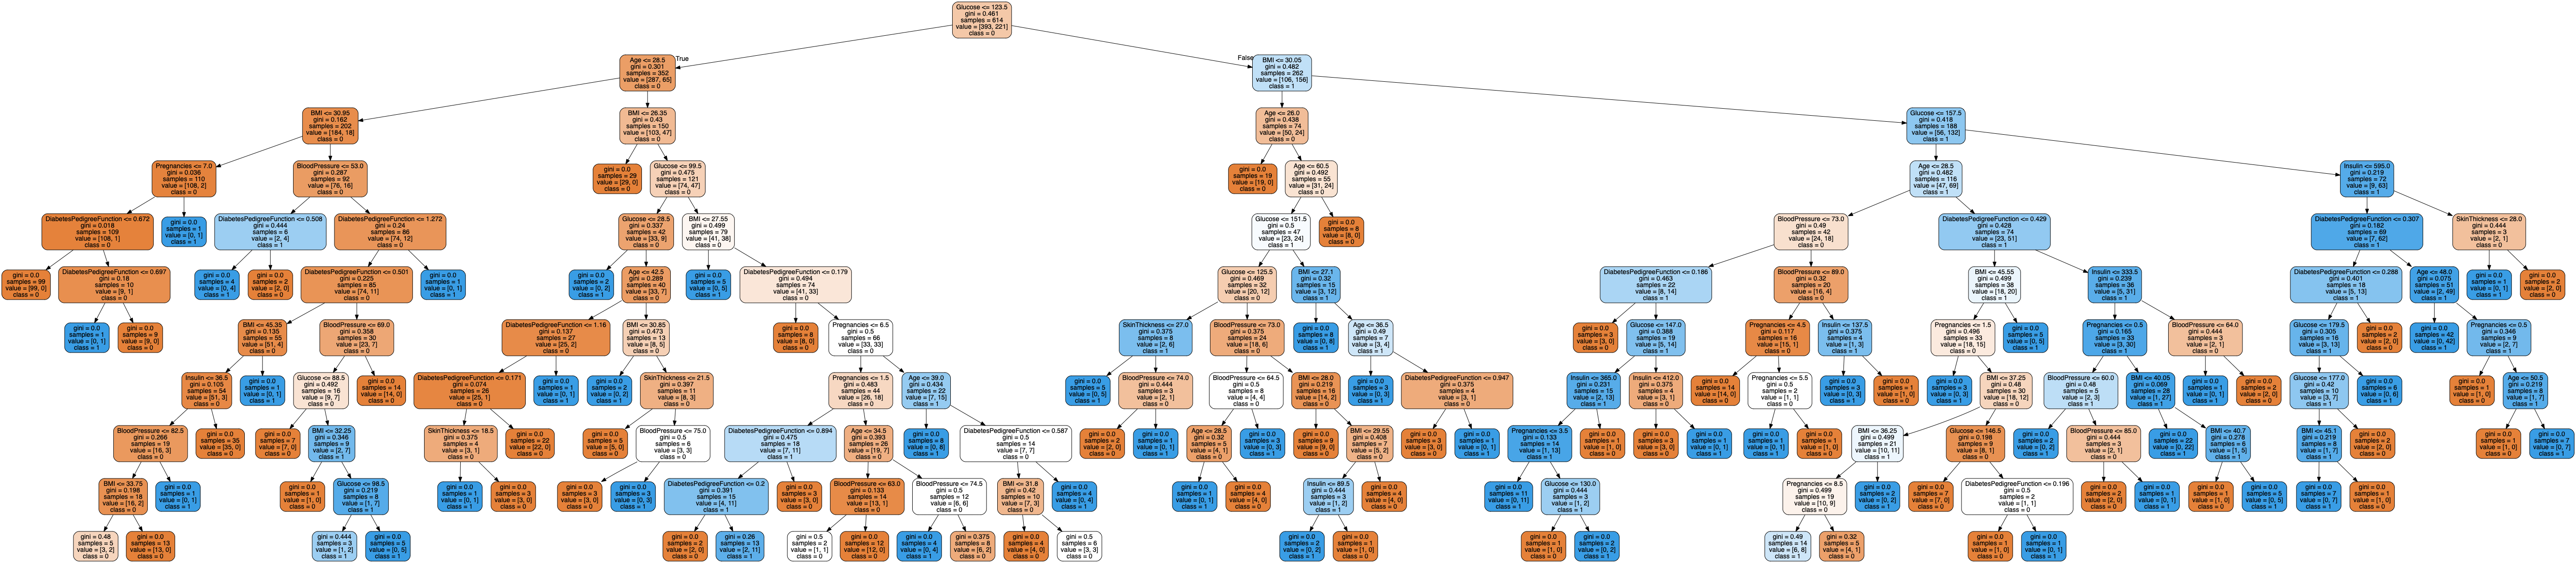

In [9]:
print("Arbol de Decisión Gini Depth 10")
graph = graph_tree(model=clasificadores['DT Gini Depth 10'], feature_names=x_features, class_names=class_names)
Image(graph.create_png())

<hr>


### <a name="M26">2.6. Evaluación de los modelos</a>

* Para cada uno de los modelos vamos a calcular las siguientes métricas de evaluación:

    + Accuracy
    + F1
    + Precision
    + Recall
    + AUC_ROC

In [10]:
evaluacion = list()
for k, v in clasificadores.items():
    print ('EVALUANDO MODELO: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_train = v.predict(X_train)
    y_pred_test = v.predict(X_test)
    y_prob_train = v.predict_proba(X_train)
    y_prob_test = v.predict_proba(X_test)
    model['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model['accuracy_tests'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train)
    model['precision_tests'] = precision_score(y_true=y_test, y_pred=y_pred_test)
    model['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train)
    model['recall_tests'] = recall_score(y_true=y_test, y_pred=y_pred_test)
    model['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train)
    model['f1_tests'] = f1_score(y_true=y_test, y_pred=y_pred_test)
    model['auc_roc_train'] = roc_auc_score(y_true=y_train, y_score=y_prob_train[:, 1])
    model['auc_roc_tests'] = roc_auc_score(y_true=y_test, y_score=y_prob_test[:, 1])
    evaluacion.append(model)

# Pasamos los resultados a un DataFrame para visualizarlos mejor
df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df

EVALUANDO MODELO: DT Gini Depth 3
EVALUANDO MODELO: DT Gini Depth 5
EVALUANDO MODELO: DT Gini Depth 10
EVALUANDO MODELO: DT Entropy Depth 3
EVALUANDO MODELO: DT Entropy Depth 5
EVALUANDO MODELO: DT Entropy Depth 10


,accuracy_train,accuracy_tests,precision_train,precision_tests,recall_train,recall_tests,f1_train,f1_tests,auc_roc_train,auc_roc_tests
name,,,,,,,,,,
DT Gini Depth 3,0.763844,0.759740,0.702128,0.631579,0.597285,0.510638,0.645477,0.564706,0.840696,0.801054
DT Gini Depth 5,0.822476,0.753247,0.788660,0.609756,0.692308,0.531915,0.737349,0.568182,0.905916,0.810101
DT Gini Depth 10,0.970684,0.811688,0.959276,0.666667,0.959276,0.765957,0.959276,0.712871,0.997709,0.817160
DT Entropy Depth 3,0.763844,0.759740,0.702128,0.631579,0.597285,0.510638,0.645477,0.564706,0.837795,0.801949
DT Entropy Depth 5,0.811075,0.740260,0.807018,0.577778,0.624434,0.553191,0.704082,0.565217,0.889526,0.787035
DT Entropy Depth 10,0.952769,0.707792,0.989796,0.520000,0.877828,0.553191,0.930456,0.536082,0.993593,0.708292


* A continuación vamos a mostrar las matrices de confusión para entrenamiento y test de cada uno de los clasificadores:

Obteniendo Matriz de Confusión de: DT Gini Depth 3
Obteniendo Matriz de Confusión de: DT Gini Depth 5
Obteniendo Matriz de Confusión de: DT Gini Depth 10
Obteniendo Matriz de Confusión de: DT Entropy Depth 3
Obteniendo Matriz de Confusión de: DT Entropy Depth 5
Obteniendo Matriz de Confusión de: DT Entropy Depth 10


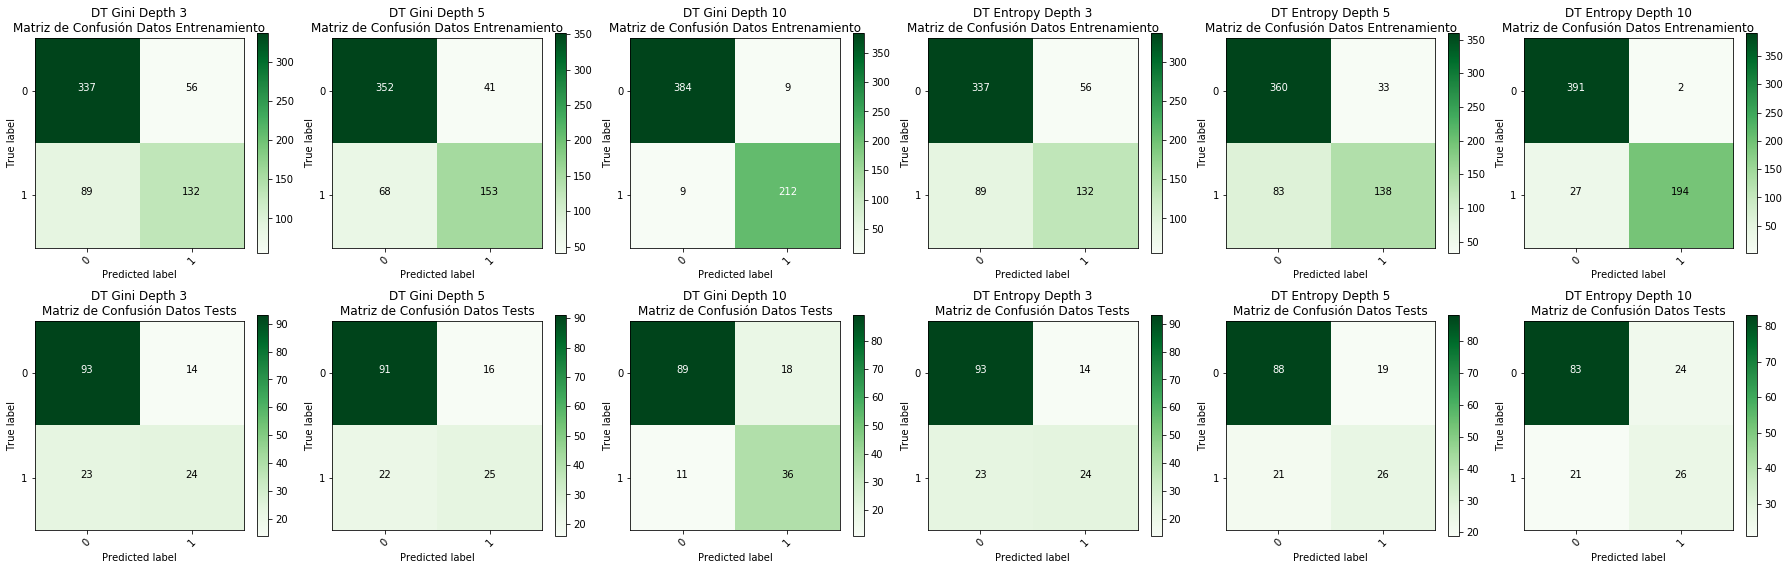

In [15]:
# Obtenemos las Matrices de confusión
msc = list()
for k, v in clasificadores.items():
    print ('Obteniendo Matriz de Confusión de: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_train = v.predict(X_train)
    y_pred_test = v.predict(X_test)
    model['confusion_matrix_train'] = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
    model['confusion_matrix_test'] = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
    msc.append(model)

# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Pintamos las matrices de confusión
plt.figure(figsize=(25, 8))
for i, mc in enumerate(msc):
    plt.subplot(2, 6, i+1)
    plot_confusion_matrix(mc['confusion_matrix_train'], classes=['0', '1'], 
                          title='{}\nMatriz de Confusión Datos Entrenamiento'.format(mc['name']))
    plt.subplot(2, 6, i+7)
    plot_confusion_matrix(mc['confusion_matrix_test'], classes=['0', '1'], 
                          title='{}\nMatriz de Confusión Datos Tests'.format(mc['name'] ))
plt.show()

<hr>


### <a name="M27">2.7. Conclusiones</a>


* Podemos observar en el ejemplo que los árboles de decisón se sobreajustan mucho a los datos de entrenamiento según aumentamos la complejidad del árbol; es decir, según incrementamos el número de niveles del árbol.


* Debemos de tener mucho cuidado a la hora de utilizar este Algoritmo de Aprendizaje ya que tiende al Overfitting según aumentamos la complejidad de nuestro modelo y al underfitting si construimos un modelo de baja complejidad.

<hr>


Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.


<img src="../../imgs/CC_BY-NC-SA.png" alt="CC BY-NC">